In [3]:
# Импорт

import pandas as pd
from clickhouse_driver import Client

In [4]:
# Функция создания датафрейма

def create_dataframe(user, password, table_name='films'):
    client = Client('90.156.216.60', user=user, password=password, database='it_minimalist_CH')
    query = f'SELECT * FROM {table_name}'
    df = client.query_dataframe(query)
    return df

3.  В ячейке ниже создается датафрейм в переменной `df`.
<br>

- Замените `'your_username'`, `'your_password'` на ваши учетные данные, которые получили на почту (у каждого своя учетная запись с индивидуальным доступом к БД Clickhouse).
<br>
- Как вы заметили в параметрах функции `create_dataframe`, по умолчанию датафрейм создатеся из таблицы `'films'`. Также в базе данных лежит таблица `'payments'`

In [5]:
films = create_dataframe(user='tanya25pm', password='klcemshu', table_name='films')
payments = create_dataframe(user='tanya25pm', password='klcemshu', table_name='payments')

# УРОК 4

In [102]:
payments.head(2)

,pay_date,film_id,part_of_day,client_id,count_tickets
0,2024-04-24,2,дневной,NL42,1.0
1,2024-03-03,15,вечерний,HW75,3.0


In [103]:
films.head(2)

,film_id,film_name,price_ticket,release_year,filmmaker,kind_film
0,1,Побег из Шоушенка,190,1994,Фрэнк Дарабонт,драма
1,2,Крёстный отец,190,1972,Фрэнсис Форд Коппола,"детектив, драма"


In [104]:
df = payments.merge(films, on='film_id', how='left')
df['pay_date'] = pd.to_datetime(df['pay_date'])
df.head(2)

,pay_date,film_id,part_of_day,client_id,count_tickets,film_name,price_ticket,release_year,filmmaker,kind_film
0,2024-04-24,2,дневной,NL42,1.0,Крёстный отец,190,1972,Фрэнсис Форд Коппола,"детектив, драма"
1,2024-03-03,15,вечерний,HW75,3.0,Звёздные войны. Эпизод V: Империя наносит отве...,190,1980,Ирвин Кершнер,"боевик, приключение, фэнтези"


In [105]:
df.groupby('film_name')['count_tickets'].sum().reset_index()

,film_name,count_tickets
0,1+1,254.0
1,12 разгневанных мужчин,250.0
2,Американская история Икс,250.0
3,Бойцовский клуб,277.0
4,Властелин колец: Братство Кольца,220.0
5,Властелин колец: Возвращение короля,228.0
6,Властелин колец: Две крепости,232.0
7,Гладиатор,277.0
8,Город Бога,199.0
9,Дюна: Часть вторая,217.0


In [106]:
df.groupby('pay_date')['count_tickets'].sum().reset_index()

,pay_date,count_tickets
0,2024-01-01,85.0
1,2024-01-02,77.0
2,2024-01-03,114.0
3,2024-01-04,71.0
4,2024-01-05,104.0
...,...,...
119,2024-04-29,83.0
120,2024-04-30,82.0
121,2024-05-01,105.0
122,2026-02-05,1.0


In [107]:
# pip install matplotlib

In [108]:
import matplotlib

https://pandas.pydata.org/docs/user_guide/visualization.html

In [109]:
df1 = df.groupby('pay_date')['count_tickets'].sum().reset_index()
df1 = df1[df1['pay_date'] <= '2024-02-01']
df1

,pay_date,count_tickets
0,2024-01-01,85.0
1,2024-01-02,77.0
2,2024-01-03,114.0
3,2024-01-04,71.0
4,2024-01-05,104.0
5,2024-01-06,79.0
6,2024-01-07,108.0
7,2024-01-08,97.0
8,2024-01-09,74.0
9,2024-01-10,86.0


<Axes: xlabel='pay_date'>

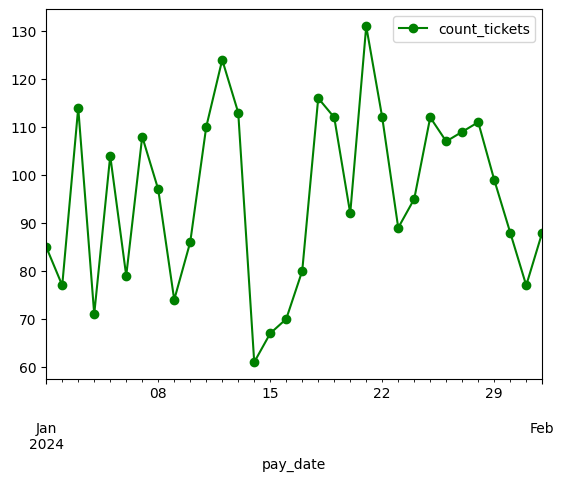

In [110]:
df1.plot.line(x='pay_date', y='count_tickets', color='green', marker='o')

### Немного статистики

In [111]:
df_stat = payments.tail(12)
df_stat

,pay_date,film_id,part_of_day,client_id,count_tickets
3950,2024-01-08,6,вечерний,OO94,4.0
3951,2024-05-01,22,дневной,GT91,4.0
3952,2024-05-01,14,утренний,DB24,1.0
3953,2024-04-09,49,дневной,YB14,2.0
3954,2024-02-29,11,дневной,DR39,3.0
3955,2024-02-15,9,утренний,ID50,2.0
3956,2024-02-29,7,вечерний,KC99,2.0
3957,2024-02-11,1,дневной,FG89,4.0
3958,2024-04-08,34,утренний,DI23,2.0
3959,2024-01-16,10,дневной,ZJ39,4.0


In [112]:
list_of_count_tickets = df_stat['count_tickets'].astype(int).to_list()
list_of_count_tickets.sort()
list_of_count_tickets

[1, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5]

(1 2 2 2 2) 3 4 (4 4 4 4 5) | Медиана = 3.5 (50% персентиль или 2-ой квартиль (Q2))

(1 2) 2 2 (2 3 4 4 4 4 4 5) | 25% персентиль или нижний квартиль Q1 = 2

(1 2 2 2 2 3 4 4) 4 4 (4 5) | 75% персентиль или верхний квартиль Q3 = 4

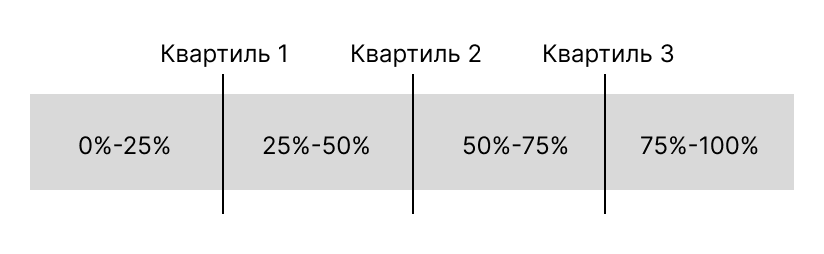

In [113]:
print(f'Минимальное значение  :{df_stat['count_tickets'].min()}')
print(f'Максимальное значение :{df_stat['count_tickets'].max()}')
print(f'Среднее значение      :{df_stat['count_tickets'].mean()}')
print(f'Медиан                :{df_stat['count_tickets'].median()}')
print(f'Нижний квартиль (25% персентиль):{df_stat['count_tickets'].quantile(0.25)}')
print(f'Верхний квартиль (75% персентиль):{df_stat['count_tickets'].quantile(0.75)}')

df_stat.boxplot(column='count_tickets')

SyntaxError: f-string: unmatched '[' (3892332621.py, line 1)

Подсказка:
<div>
<img src="attachment:87a62557-9296-4092-b71f-24bcabc2040c.png" width="320"/>
</div> 

In [ ]:
# добавим выбросы
df_outlier = pd.DataFrame({
    'pay_date': ['2024-01-01'],
    'film_id': [1],
    'part_of_day': ['вечерний'],
    'client_id': ['GT91'],
    'count_tickets': [8]
})
df_outlier

,pay_date,film_id,part_of_day,client_id,count_tickets
0,2024-01-01,1,вечерний,GT91,8


In [ ]:
df_stat_with_outlier = pd.concat([df_stat, df_outlier])
df_stat_with_outlier

,pay_date,film_id,part_of_day,client_id,count_tickets
3950,2024-01-08,6,вечерний,OO94,4.0
3951,2024-05-01,22,дневной,GT91,4.0
3952,2024-05-01,14,утренний,DB24,1.0
3953,2024-04-09,49,дневной,YB14,2.0
3954,2024-02-29,11,дневной,DR39,3.0
3955,2024-02-15,9,утренний,ID50,2.0
3956,2024-02-29,7,вечерний,KC99,2.0
3957,2024-02-11,1,дневной,FG89,4.0
3958,2024-04-08,34,утренний,DI23,2.0
3959,2024-01-16,10,дневной,ZJ39,4.0


<Axes: >

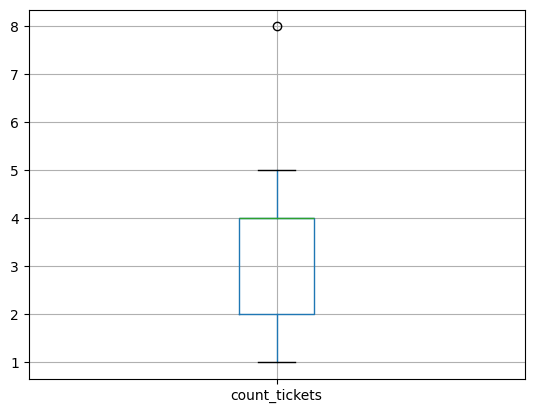

In [ ]:
df_stat_with_outlier.boxplot(column='count_tickets')

**Как опредялем выбросы:**

Метод IQR

IQR = Q3 - Q1

In [ ]:
Q1 = df_stat['count_tickets'].quantile(0.25)
print(f'Q1: {Q1}')
Q3 = df_stat['count_tickets'].quantile(0.75)
print(f'Q3: {Q3}')
IQR = Q3 - Q1
print(f'IQR: {IQR}')

Q1: 2.0
Q3: 4.0
IQR: 2.0


In [ ]:
print(f'Нижний предел= {Q1 - 1.5*IQR}')
print(f'Верхний предел= {Q3 + 1.5*IQR}')

Нижний предел= -1.0
Верхний предел= 7.0


### Вернемся к графикам в pandas

In [ ]:
df.groupby('film_id')['film_name'].count()

film_id
1      78
2      89
3      85
4      77
5      82
6      85
7      78
8      82
9      72
10     86
11     68
12     79
13     94
14     72
15     78
16    174
17     90
18     84
19     79
20     81
21     75
22     88
23     67
24     88
25     89
26     70
27     62
28     75
29     77
30     84
31     60
32     72
33     85
34     89
35     82
36     81
37     87
38     87
39     85
40     72
41     89
42    111
43     79
44     78
45     87
46     79
47     78
48     89
49     65
50      1
52      2
53      6
Name: film_name, dtype: int64

<Axes: ylabel='Frequency'>

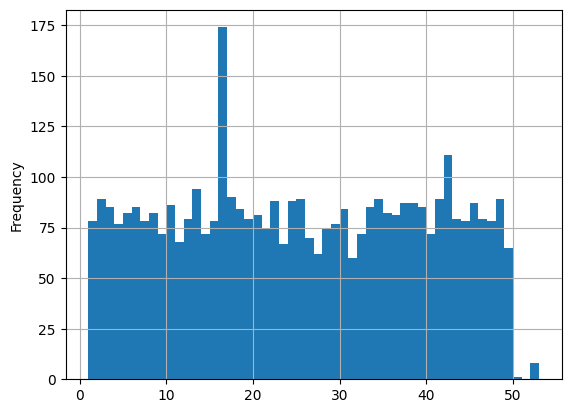

In [ ]:
df['film_id'].plot.hist(bins=df['film_id'].nunique(), grid=True)

In [ ]:
df2 = df[df['filmmaker']=='Кристофер Нолан']
df2 = df2.pivot_table(index='film_name', columns='part_of_day', values='count_tickets',aggfunc='sum')
df2

part_of_day,вечерний,дневной,утренний
film_name,,,
Интерстеллар,73.0,90.0,87.0
Начало,76.0,80.0,78.0
Престиж,85.0,78.0,60.0
Тёмный рыцарь,84.0,76.0,95.0


<Axes: xlabel='film_name'>

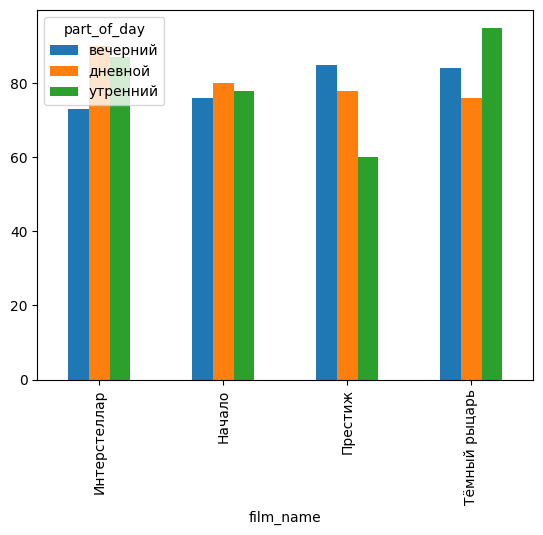

In [ ]:
df2.plot.bar()

<Axes: xlabel='film_name'>

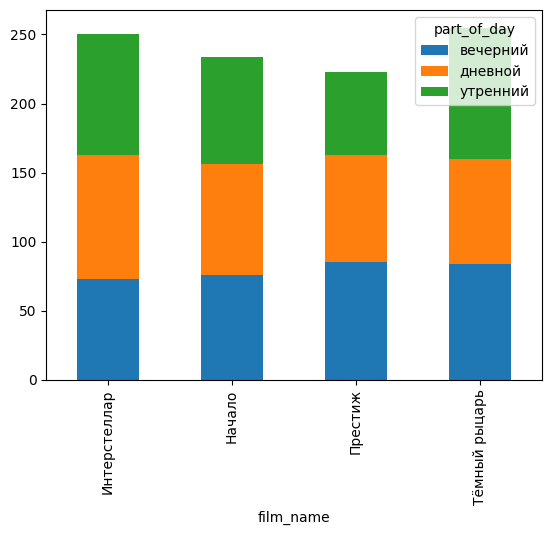

In [ ]:
df2.plot.bar(stacked=True)

array([<Axes: title={'center': 'вечерний'}, xlabel='film_name'>,
       <Axes: title={'center': 'дневной'}, xlabel='film_name'>,
       <Axes: title={'center': 'утренний'}, xlabel='film_name'>],
      dtype=object)

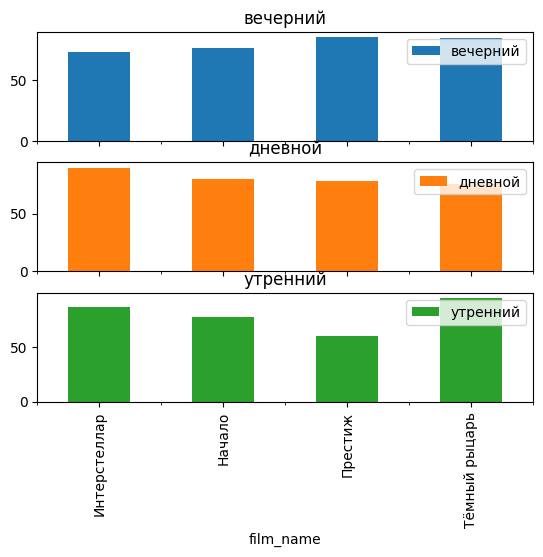

In [ ]:
df2.plot.bar(subplots=True)

<Axes: xlabel='film_name'>

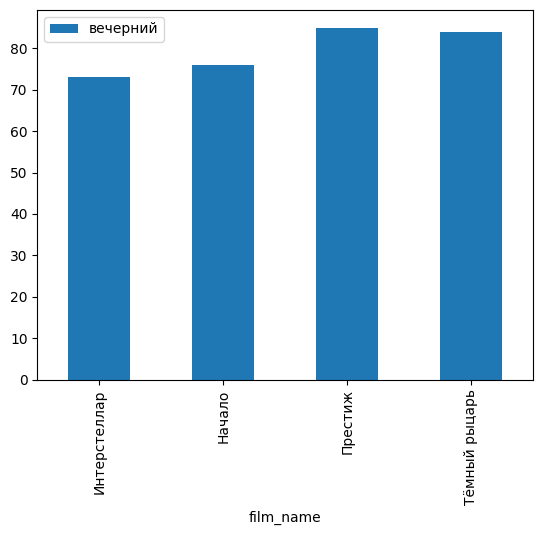

In [ ]:
df2.plot.bar(y='вечерний')

<Axes: ylabel='film_name'>

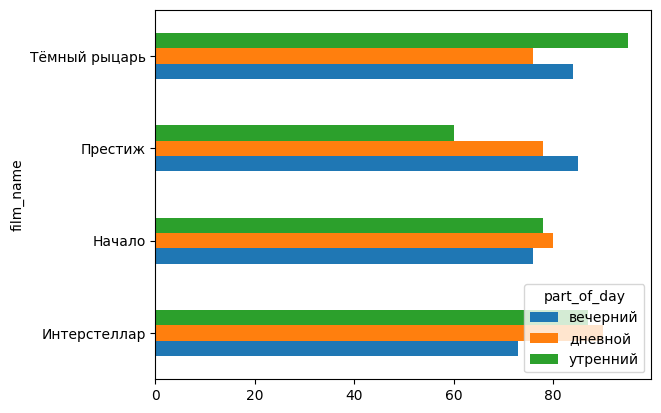

In [ ]:
df2.plot.barh()

In [ ]:
df['dengi'] = df['count_tickets'] * df['price_ticket']
df.head(2)

,pay_date,film_id,part_of_day,client_id,count_tickets,film_name,price_ticket,release_year,filmmaker,kind_film,dengi
0,2024-04-24,2,дневной,NL42,1.0,Крёстный отец,190,1972,Фрэнсис Форд Коппола,"детектив, драма",190.0
1,2024-03-03,15,вечерний,HW75,3.0,Звёздные войны. Эпизод V: Империя наносит отве...,190,1980,Ирвин Кершнер,"боевик, приключение, фэнтези",570.0


In [ ]:
df3 = df[df['filmmaker']=='Кристофер Нолан']
df3 = df3[df3['pay_date']<='2024-01-07']
df3 = df3.pivot_table(index='pay_date', columns='part_of_day', values='dengi',aggfunc='sum')
df3 = df3.fillna(0)
df3

part_of_day,вечерний,дневной,утренний
pay_date,,,
2024-01-01,1330.0,0.0,340.0
2024-01-02,0.0,760.0,0.0
2024-01-03,680.0,2310.0,340.0
2024-01-05,4010.0,380.0,1730.0
2024-01-06,1350.0,1700.0,1700.0
2024-01-07,570.0,3200.0,0.0


<Axes: xlabel='pay_date'>

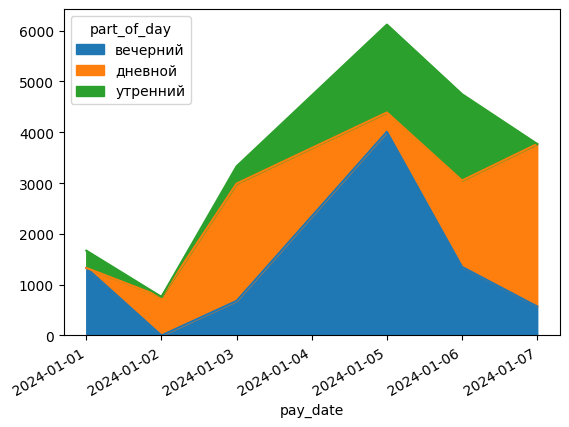

In [ ]:
df3.plot.area()

<Axes: ylabel='Density'>

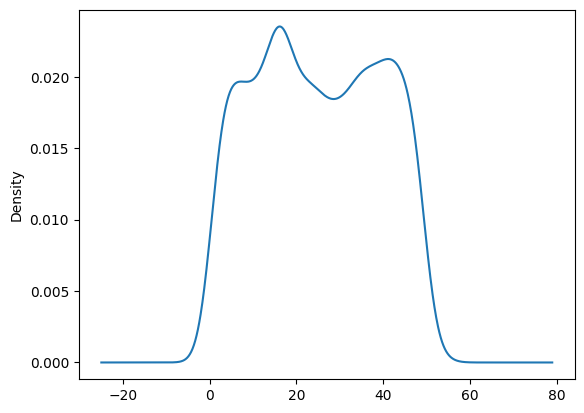

In [ ]:

df['film_id'].plot.density()

In [ ]:
df6 = df
df6.head(2)

,pay_date,film_id,part_of_day,client_id,count_tickets,film_name,price_ticket,release_year,filmmaker,kind_film,dengi
0,2024-04-24,2,дневной,NL42,1.0,Крёстный отец,190,1972,Фрэнсис Форд Коппола,"детектив, драма",190.0
1,2024-03-03,15,вечерний,HW75,3.0,Звёздные войны. Эпизод V: Империя наносит отве...,190,1980,Ирвин Кершнер,"боевик, приключение, фэнтези",570.0


In [ ]:
df6['price_ticket'].unique()

array([190, 450, 290, 340], dtype=int64)

<Axes: xlabel='price_ticket', ylabel='dengi'>

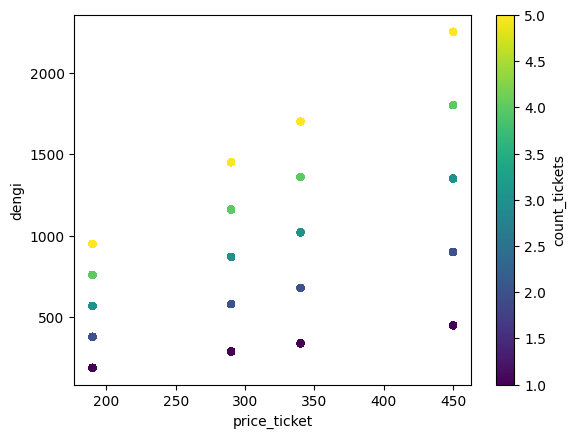

In [ ]:
df6.plot.scatter(x='price_ticket', y='dengi', c='count_tickets',colormap='viridis')

In [ ]:
df5 = df[df['release_year'] >= 2014]
df5= df5.groupby('film_name')['dengi'].sum()
df5

film_name
Дюна: Часть вторая                  41230.0
Интерстеллар                        47500.0
Одержимость                         92220.0
Паразиты                           117450.0
Человек-паук: Паутина вселенных    108900.0
Name: dengi, dtype: float64

In [ ]:
df5.sum()

407300.0

<Axes: ylabel='dengi'>

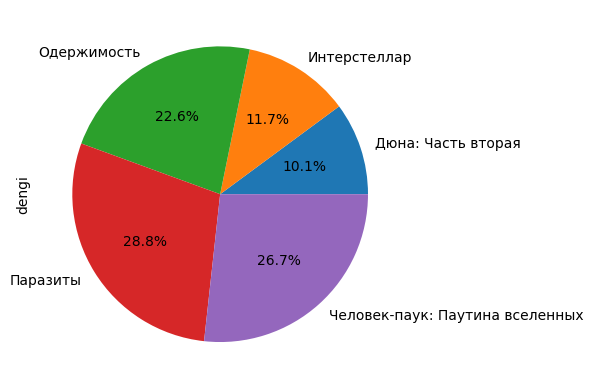

In [ ]:
df5.plot.pie(autopct='%1.1f%%')

## Визуализация датафреймов

In [ ]:
df55 = df5.reset_index()
df55

,film_name,dengi
0,Дюна: Часть вторая,41230.0
1,Интерстеллар,47500.0
2,Одержимость,92220.0
3,Паразиты,117450.0
4,Человек-паук: Паутина вселенных,108900.0


In [ ]:
# highlight_max / highlight_min /highlight_null
df55.style.hide().format(precision=0, thousands=' ').highlight_max(color='orange', subset='dengi') 

film_name,dengi
Дюна: Часть вторая,41 230
Интерстеллар,47 500
Одержимость,92 220
Паразиты,117 450
Человек-паук: Паутина вселенных,108 900


In [ ]:
def color_green(val):
    if val == df55['dengi'].min():
        color = 'green'
    else:
        color = 'black'
    display('color: %s' % color)
    return 'color: %s' % color

In [ ]:
df55.style.hide().format(precision=0, thousands=' ').map(color_green)

'color: black'

'color: black'

'color: black'

'color: black'

'color: black'

'color: green'

'color: black'

'color: black'

'color: black'

'color: black'

film_name,dengi
Дюна: Часть вторая,41 230
Интерстеллар,47 500
Одержимость,92 220
Паразиты,117 450
Человек-паук: Паутина вселенных,108 900


## Давайте сделаем красиво!

In [11]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

## Выручка по фильмам, которые вышли в 2014 году и позже

### Общая выручка по фильмам: 407300.0 руб.

film_name,dengi
Дюна: Часть вторая,41 230
Интерстеллар,47 500
Одержимость,92 220
Паразиты,117 450
Человек-паук: Паутина вселенных,108 900


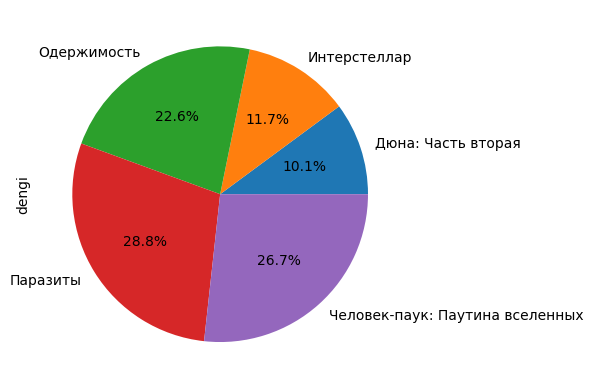

In [ ]:
total_sum = df5.sum()

printmd('## Выручка по фильмам, которые вышли в 2014 году и позже')
printmd('### Общая выручка по фильмам: ' + str(total_sum) + ' руб.')

display(df55.style.hide().format(precision=0, thousands=' ').bar(cmap='bwr'))
df5.plot.pie(autopct='%1.1f%%');

# Домашнее задание 4

#### 1. Создайте отчет в виде сводной таблицы по дням недели, которая продемонстрирует — в какой день недели сколько было выручки? (да, это задание из 3-его ДЗ). Но теперь давайте визуализируем эти сводные данные. Подберите подходящую визуализацию и постройте ее.

In [6]:
# your code 
# копируем  все с ДЗ 3 для удобства 

import matplotlib.pyplot as plt
%matplotlib inline

films = create_dataframe(user='tanya25pm', password='klcemshu', table_name='films')
payments = create_dataframe(user='tanya25pm', password='klcemshu', table_name='payments')

payments.dropna(subset='pay_date', inplace=True) 
payments.dropna(subset='count_tickets', inplace=True) 

payments = payments.drop_duplicates(keep='first')
films = films.drop_duplicates(keep='first')

df = payments.merge(films, how='left', on='film_id') 

df['pay_date'] = pd.to_datetime(df['pay_date'])

df.insert(1, 'week_day', df['pay_date'].dt.day_name(locale= 'ru_RU'))
df.insert(7, 'revenue', df['count_tickets'] * df['price_ticket'])

df['number_week_day'] = df['pay_date'].dt.dayofweek #  дополнительно добавим столбец с номером дня недели


In [7]:
#  создадим сводную таблицу и отсортируем по дням недели
df_pivot_days = df \
    .pivot_table(index= ['number_week_day', 'week_day'], values='revenue', aggfunc='sum') \
    .reset_index(drop=False) \
    .sort_values(['number_week_day'], ascending=True)    


In [12]:
df_0 = df_pivot_days.reset_index(drop='True') # cделаем таблицу для отображения без индексов

df_0 = df_0[['week_day', 'number_week_day', 'revenue']] # поменяем столбцы местами
df_0.drop('number_week_day', axis=1, inplace=True) # сносим столбец с номером дня недели

total_sum = df_0['revenue'].sum() # общая сумма выручки

In [14]:
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

## Выручка от продажи билетов по дням недели

### Общая выручка от продажи билетов: 3395110.0 руб.

week_day,revenue
Понедельник,515 440
Вторник,447 010
Среда,492 140
Четверг,449 940
Пятница,502 930
Суббота,509 080
Воскресенье,478 570


(array([440000., 450000., 460000., 470000., 480000., 490000., 500000.,
        510000., 520000.]),
 [Text(0, 440000.0, '440000'),
  Text(0, 450000.0, '450000'),
  Text(0, 460000.0, '460000'),
  Text(0, 470000.0, '470000'),
  Text(0, 480000.0, '480000'),
  Text(0, 490000.0, '490000'),
  Text(0, 500000.0, '500000'),
  Text(0, 510000.0, '510000'),
  Text(0, 520000.0, '520000')])

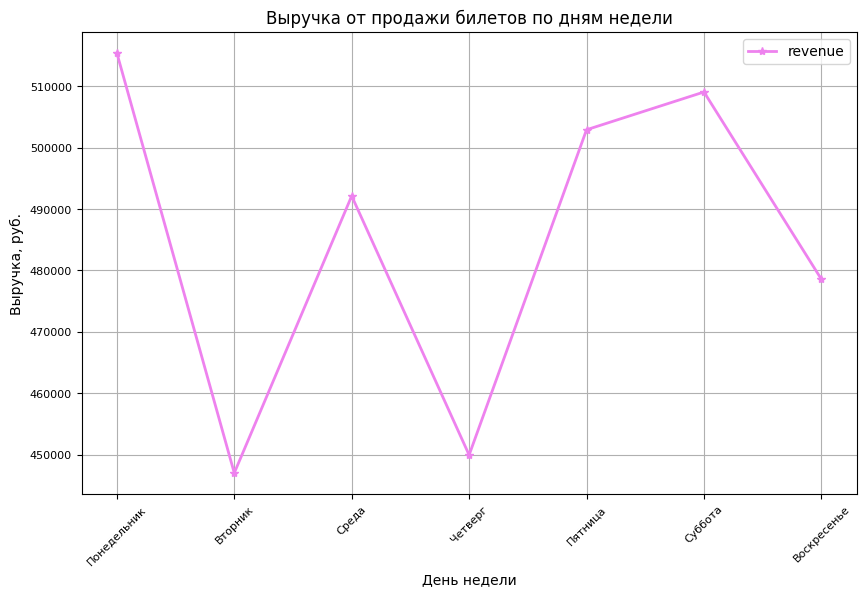

In [13]:
printmd('## Выручка от продажи билетов по дням недели')
printmd('### Общая выручка от продажи билетов: ' + str(total_sum) + ' руб.')

display(df_0.style.hide().format(precision=0, thousands=' ').bar(cmap='tab20b'))


fig_1 = df_pivot_days.plot.line(
    figsize=(10, 6),
    x = 'week_day',
    y = 'revenue',
    title='Выручка от продажи билетов по дням недели',
    grid = True, 
    lw=2,
    color= 'violet',
    xlabel= 'День недели',
    ylabel= 'Выручка, руб.',
    marker= '*',
        )
plt.xticks (rotation= 45, fontsize = 8)
plt.yticks(fontsize = 8)

#### 2. Инициализируйте датафрейм с ростом некоторых людей. Постройте **boxplot** и опишите, что вы видите (какой минимум, максимум, медиана, квартили и выбросы)

In [ ]:
df_for_boxplot = pd.DataFrame(
   {
      "Рост": ["Даня", "Артем", "Виктор", "Анна", "Петр", "Александр", "Елена", "Павел Подкользин"],
      "Сантиметры": [187, 143, 179, 167, 174, 191, 173, 226],
   }
)
df_for_boxplot

,Рост,Сантиметры
0,Даня,187
1,Артем,143
2,Виктор,179
3,Анна,167
4,Петр,174
5,Александр,191
6,Елена,173
7,Павел Подкользин,226


<Axes: >

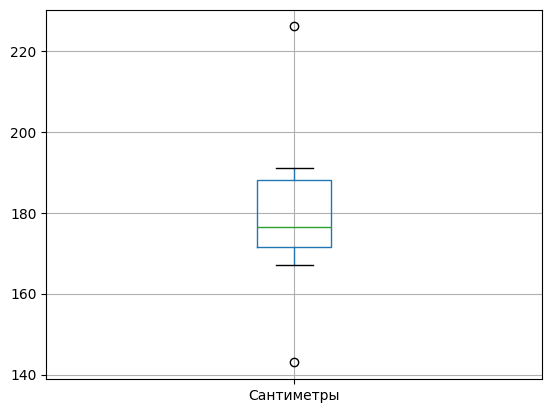

In [ ]:
# your code
df_for_boxplot.boxplot(column=['Сантиметры'])
# выбросы попали люди с минимальным ростом 143 см (Артем) и максимальным ростом  (Павел Подлазкин)
# медиана составляет примерно 177 см
# нижний квартиль составляем примерно 170 см
# верхниль квартиль составляет примерно 190 см

#### 3. Возьмите любой датафрейм и выделите фиолетовым цветом максимальное значение в одном из столбцов

In [ ]:
# your code 
# purple очень темное выделение, с цифрами сливается, поэтому будет violet
df_for_boxplot.style.hide().highlight_max(color='violet', subset='Сантиметры') 

Рост,Сантиметры
Даня,187
Артем,143
Виктор,179
Анна,167
Петр,174
Александр,191
Елена,173
Павел Подкользин,226
